In [1]:
%matplotlib inline
import numpy as np
import math
from copy import copy, deepcopy
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.animation as animation
from IPython.display import HTML
animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']

In [2]:
def simulated_annealing(T, E, step, step_back = None, p = 0.9999, iters = 10000, anim_step = None):
    i = 0
    i_x = []
    i_y = []
    cT = deepcopy(T)
    anim = []
    while i < iters:
        if step_back == None:
            to_restore = deepcopy(cT)
        
        Ep = E(cT)
        step_prop = step(cT)
        En = E(cT)
        if En > Ep and random.random() > p:
            if step_back == None:
                cT = to_restore
            else:
                step_back(cT, *step_prop) 
        
        i_x.append(i)
        i_y.append(E(cT))
        if anim_step != None and i % anim_step == 0:
            anim.append(deepcopy(cT))
        p *= 0.999
        i += 1
    return cT, i_x, i_y, anim

# TSP

In [ ]:
def generate_random_points(n, a = 100):
    return [(random.random()*a, random.random()*a) for i in range(n)]

In [ ]:
def show(points):
    x = list(map(lambda x: x[0], points))
    y = list(map(lambda x: x[1], points))
    plt.plot(x, y)
    plt.show()

In [ ]:
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [ ]:
def E(points):
    E = 0
    for i in range(len(points)):
        E += dist(points[i], points[(i+1)%len(points)])
    return E

In [ ]:
def make_swap(points):
    i = random.randint(0, len(points)-1)
    j = random.randint(0, len(points)-1)
    points[i], points[j] = points[j], points[i]
    return i, j

In [ ]:
def make_swap_neigh(points):
    i = random.randint(0, len(points)-2)
    points[i], points[i+1] = points[i+1], points[i]
    return i, i + 1

In [ ]:
def make_back_swap(points, i, j):
    points[i], points[j] = points[j], points[i]

In [ ]:
def TSP():
    N = 500
    MAX_ITERS = 10000
    points = generate_random_points(N, 1000)
    show(points)
    points, i_x, i_y = simulated_annealing(points, E, make_swap, make_back_swap, p = 0.99999, iters=100000)
    show(points)
    return i_x, i_y
    
i_x, i_y = TSP()

In [ ]:
plt.plot(i_x, i_y)
plt.show()

# Binary Images

In [3]:
def random_image(w,h,p=0.3):
    img = np.array([0 if random.random() > p else 1 for i in range(w*h)])
    return np.reshape(img, (w, h))

In [4]:
def show_image(img):
    imgplot = plt.imshow(img, cmap = mpl.cm.Greys)
    plt.show()

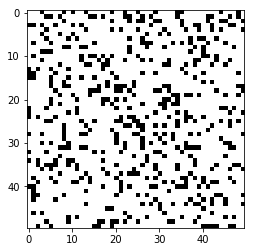

In [5]:
img = random_image(50,50,0.2)
show_image(img)

In [6]:
def make_img_swap(img):
    w,h = np.shape(img)
    i1 = random.randint(0,w - 1)
    j1 = random.randint(0,h - 1)
    i2 = random.randint(0,w - 1)
    j2 = random.randint(0,h - 1)
    img[i1][j1], img[i2][j2] = img[i2][j2], img[i1][j1]
    return i1, j1, i2, j2

In [7]:
def make_img_back_swap(img, i1, j1, i2, j2):
    img[i1][j1], img[i2][j2] = img[i2][j2], img[i1][j1]

In [8]:
def E(img):
    sum = 0
    w, h = np.shape(img)
    for i in range(1,w-1):
        for j in range(1,h-1):
            sum += img[i][j]*(2**(img[i-1][j] + img[i][j-1] + img[i+1][j] + img[i][j+1]))
    return -sum

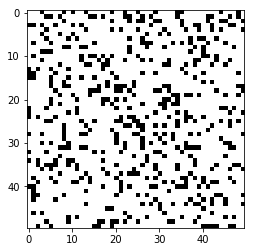

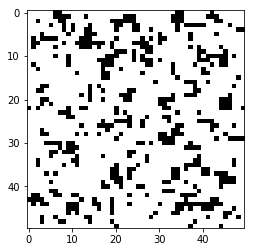

In [38]:
show_image(img)
res_img, i_x, i_y, anim = simulated_annealing(img, E, make_img_swap, make_img_back_swap, p=0.9999, iters=5000, anim_step=10)
show_image(res_img)

In [39]:
def show_anim(anim):
    fig = plt.figure()
    ims = []
    for img in anim:
        im = plt.imshow(img, cmap = mpl.cm.Greys, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False,repeat_delay=10000)
    plt.close()
    display(HTML(ani.to_html5_video()))

In [40]:
#show_image(res_img)
show_anim(anim)

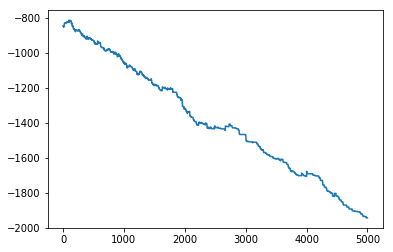

In [41]:
plt.plot(i_x, i_y)
plt.show()